In [1]:
import numpy as np
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import fitsne

In [14]:
label_csv_hiv = pd.read_csv('label_hiv.csv')
label_np_hiv = np.array(label_csv_hiv['x'])

# HIV dataset.

In [15]:
art_tsne_hiv = np.load('hiv_norm_70_transformed_fitsne.npy')

In [16]:
dict = {'NK cell': 6, 'DCs': 7, 'T cell': 1, 'B cell': 4, 'CTLs': 5, 'monocyte': 2, 'plasmablast': 3}

In [17]:
color_hiv = np.zeros(label_np_hiv.shape)
print(color_hiv.shape)
for i in range(color_hiv.shape[0]):
    color_hiv[i] = dict[label_np_hiv[i]]

(59286,)


In [18]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt

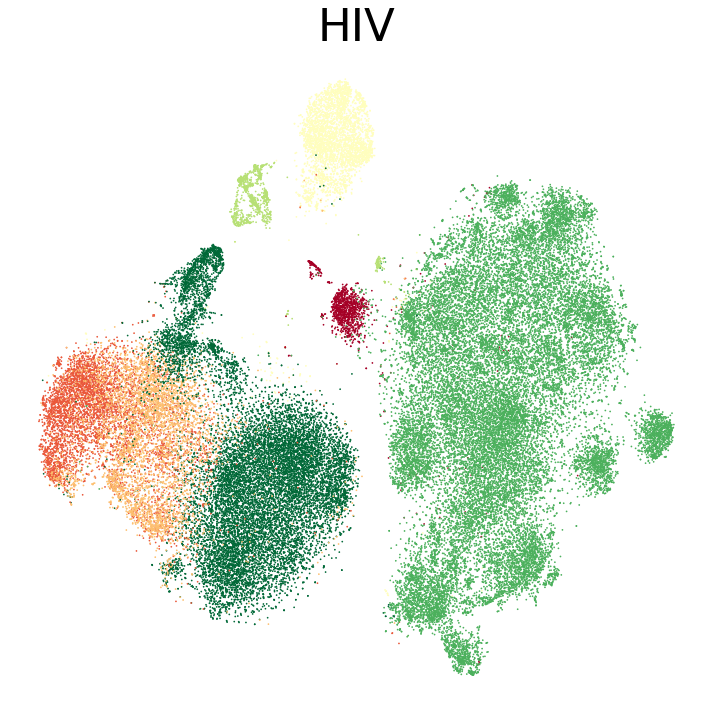

In [19]:
plt.figure(figsize=(10,10))
    
scatter = plt.scatter(art_tsne_hiv[:, 0], art_tsne_hiv[:, 1], c=color_hiv, s=0.5, cmap=plt.cm.get_cmap("RdYlGn_r"), label=label_np_hiv)

plt.title('HIV', fontsize=45)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.tight_layout()
plt.savefig('hiv_art_tsne_70_large')
plt.show()

# BMNC dataset.

In [20]:
art_tsne_bm = np.load('BMNC_RNA_norm_70_transformed_fitsne.npy')

In [21]:
label_np_bm = np.load("seurat_bmnc_label.npy", allow_pickle=True)
label_np_bm[:10]

array(['Prog_RBC', 'gdT', 'CD4 Naive', 'CD4 Memory', 'CD14 Mono',
       'Naive B', 'CD8 Naive', 'CD14 Mono', 'Naive B', 'CD4 Naive'],
      dtype=object)

In [23]:
df = pd.DataFrame(label_np_bm,columns=['status'])
status_dict = df['status'].unique().tolist()
print(len(status_dict))
print(status_dict[0], status_dict[20])
status_dict

27
Prog_RBC Prog_Mk


['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [24]:
df['transformed']=df['status'].apply(lambda x : status_dict.index(x))
label = np.array(df['transformed'])
print(label.shape)
label[:100]

simplied_label = np.zeros((label.shape), dtype=np.int32)
for i in range(label.shape[0]):
    if label[i] == 0:
        simplied_label[i] = 0
    elif label[i] == 20:
        simplied_label[i] = 1
    else:
        simplied_label[i] = 2

simplied_label[:100]

(30672,)


array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from matplotlib.lines import Line2D

cmap=plt.cm.get_cmap("gist_ncar")

lw=12.0
custom_lines = [Line2D([0], [0], color='gold', lw=lw, label='Prog_RBC'),
                Line2D([0], [0], color='black', lw=lw, label='Prog_MK'),
                Line2D([0], [0], color='gainsboro', lw=lw, label='others')]

In [26]:
c_dict = ['gold', 'black', 'gainsboro']
color_bm = []
for i in range(label.shape[0]):
    if simplied_label[i] == 0:
        color_bm.append(c_dict[0])
    elif simplied_label[i] == 1:
        color_bm.append(c_dict[1])
    else:
        color_bm.append(c_dict[2])

<function matplotlib.pyplot.show(close=None, block=None)>

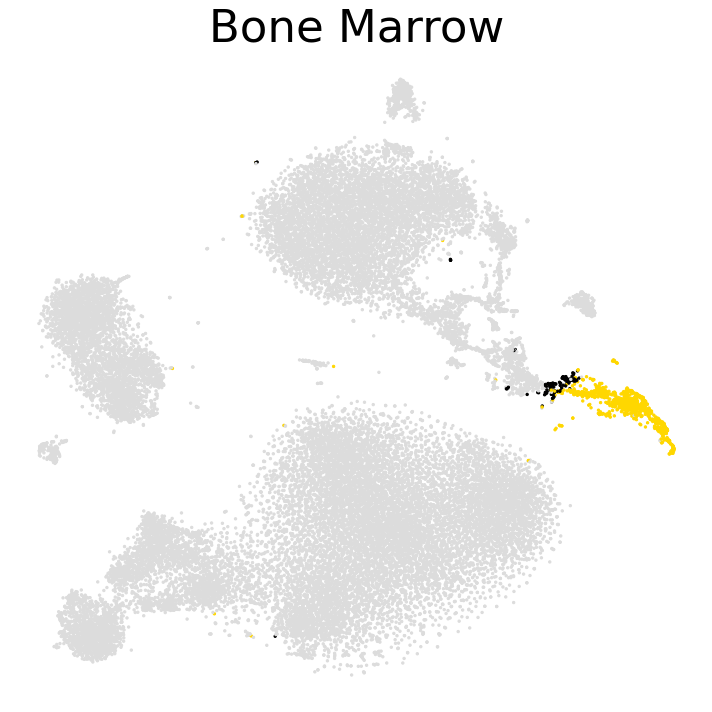

In [27]:
plt.figure(figsize=(10,10))    

scatter = plt.scatter(art_tsne_bm[:, 0], art_tsne_bm[:, 1], 
                      c=color_bm, 
                      s=5.6, label=simplied_label)

plt.title('Bone Marrow', fontsize=45)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.tight_layout()
plt.savefig('bm_art_tsne_70_large')
plt.show

# MNIST dataset.

In [28]:
import tensorflow.compat.v1 as tf

In [37]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_mnist = np.concatenate((x_train, x_test), axis=0).reshape(70000, 28*28).astype(np.float64)
labelmnist = np.concatenate((y_train, y_test))

In [38]:
pcaInit = PCA(n_components=2).fit_transform(X_mnist)
pcaInit = pcaInit / np.std(pcaInit[:,0]) * 0.0001
mnist_transformed = fitsne.FItSNE(np.double(X_mnist), 
                                  perplexity_list=[30, int(X_mnist.shape[0]/100)], 
                                    initialization=pcaInit, learning_rate=X_mnist.shape[0]/12)

In [46]:
labelmnist[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [44]:
for i in range(labelmnist.shape[0]):
    label_mnist = (labelmnist + 8) % 10

In [47]:
label_mnist = (labelmnist + 8) % 10

In [48]:
label_mnist[0:20]

array([3, 8, 2, 9, 7, 0, 9, 1, 9, 2, 1, 3, 1, 4, 9, 5, 0, 6, 4, 7],
      dtype=uint8)

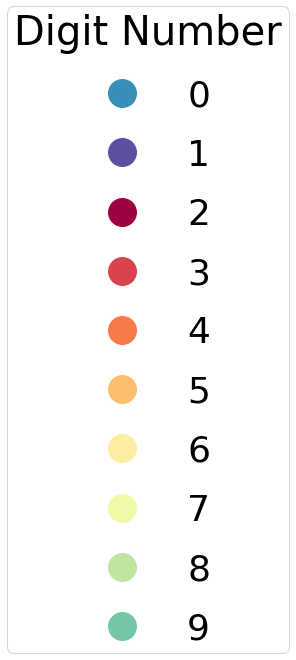

In [54]:
plt.figure(figsize=(4,10))
cmap=plt.cm.get_cmap("Spectral")
markersize=10

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(8./9), markersize=markersize, label='0'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(9./9), markersize=markersize, label='1'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0./9), markersize=markersize, label='2'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1./9), markersize=markersize, label='3'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(2./9), markersize=markersize, label='4'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(3./9), markersize=markersize, label='5'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(4./9), markersize=markersize, label='6'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(5./9), markersize=markersize, label='7'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(6./9), markersize=markersize, label='8'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(7./9), markersize=markersize, label='9'),
                ]

plt.legend(custom_lines, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=36, markerscale=3.0,
                    loc="center", title="Digit Number", title_fontsize=40, labelspacing=0.7, borderpad=0.2)
plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_legend_large_name')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

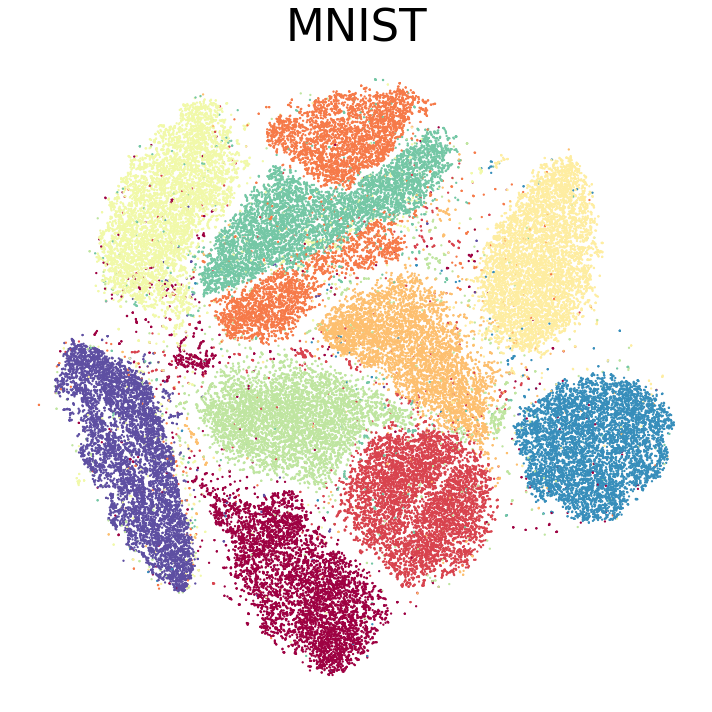

In [45]:
plt.figure(figsize=(10,10))    

scatter = plt.scatter(mnist_transformed[:, 0], mnist_transformed[:, 1], c=label_mnist, s=1.6, cmap='Spectral')

plt.title('MNIST', fontsize=45)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_art_tsne_large')
plt.show

# Merge

In [1]:
from PIL import Image
arr = ['hiv_legend_large_name.png', 'hiv_art_tsne_70_large.png', 'BMNC_legend_large_name.png', 'bm_art_tsne_70_large.png', 
       'mnist_legend_large_name.png', 'mnist_art_tsne_large.png']
toImage = Image.new('RGBA',(720 * 3 + 72 * 12 + 320, 720))

for i in range(6):
    fromImge = Image.open(arr[i])
    loc = (int(i%2)*320 + int(i/2)*72*16, 0)
    print(loc)
    toImage.paste(fromImge, loc)

toImage.save('art_tsne_merged.png')

(0, 0)
(320, 0)
(1152, 0)
(1472, 0)
(2304, 0)
(2624, 0)
